In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load dataset
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("MedHouseVal")], axis=1)

In [3]:
df.shape

(20640, 9)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Basic info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
#Missing values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

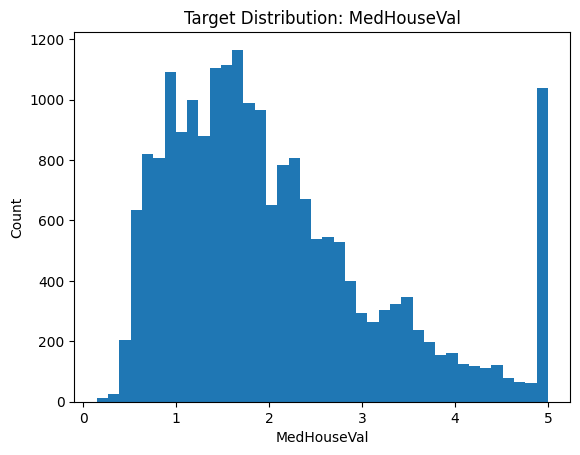

In [10]:
#Quick EDA plots
#Target distribution
plt.figure()
plt.hist(df["MedHouseVal"], bins=40)
plt.title("Target Distribution: MedHouseVal")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()

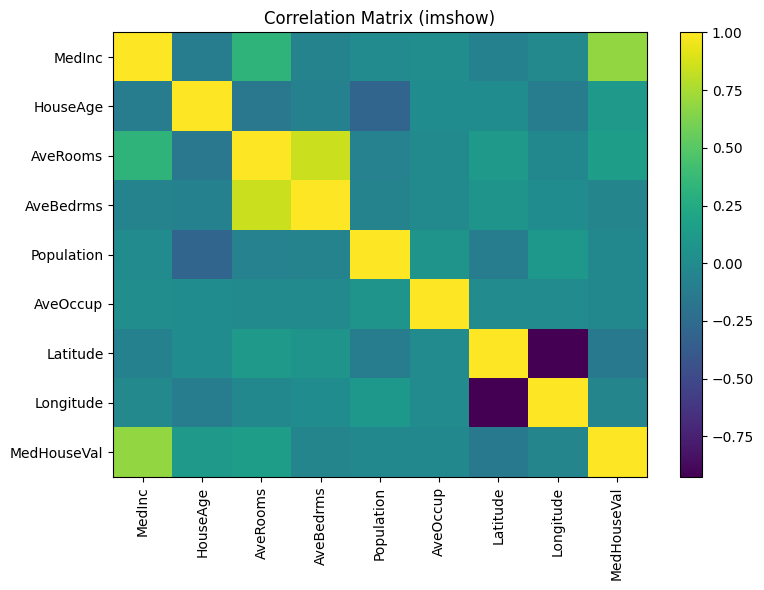

In [11]:
#Correlation heat-ish (simple)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect="auto")
plt.title("Correlation Matrix (imshow)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

In [12]:
#Train/Test split
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16512, 8) Test shape: (4128, 8)


In [13]:
#Build + train model (Pipeline: StandardScaler -> LinearRegression)
model=LinearRegression( )
model. fit (X_train, y_train)
y_pred=model.predict(X_test)


In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Metrics 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R2"],
    "Value": [mae, rmse, r2]
})

print("\nModel Performance:")
display(metrics)


Model Performance:


,Metric,Value
0,MAE,0.533200
1,RMSE,0.745581
2,R2,0.575788


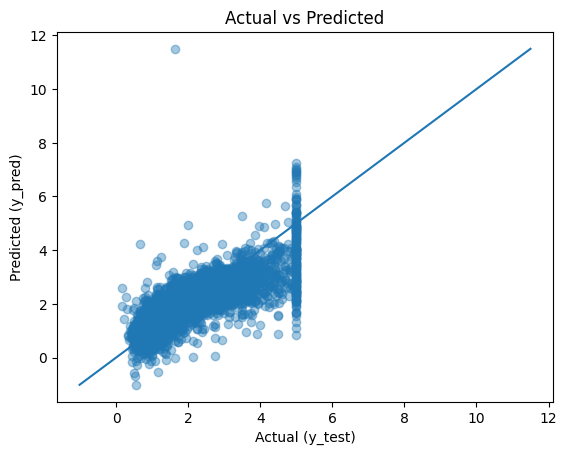

In [16]:
#Actual vs Predicted plot
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title("Actual vs Predicted")
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted (y_pred)")
# 45-degree line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()

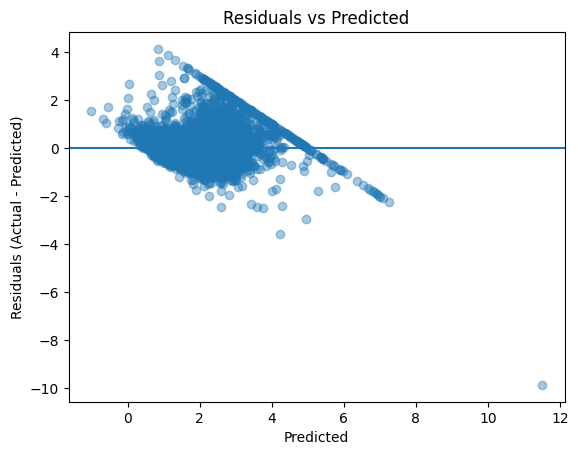

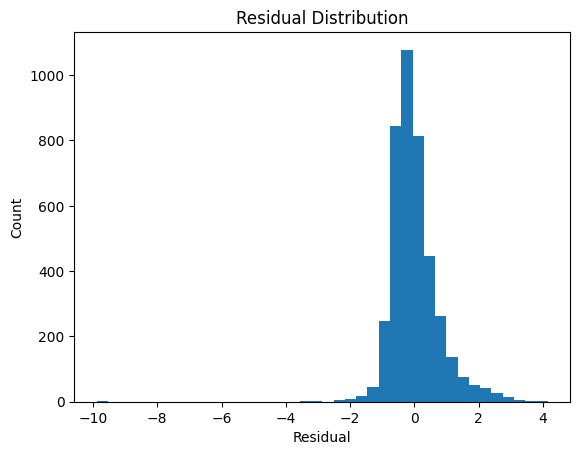

In [17]:
#Residual plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()
# Residual distribution
plt.figure()
plt.hist(residuals, bins=40)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

In [19]:
# Prediction on a test sample (example)
new_sample = pd.DataFrame([{
    "MedInc": 8.3,
    "HouseAge": 21,
    "AveRooms": 5.8,
    "AveBedrms": 1.0,
    "Population": 900,
    "AveOccup": 2.7,
    "Latitude": 34.2,
    "Longitude": -118.4
}])

pred_value = model.predict(new_sample)[0]
print("\nExample prediction (MedHouseVal):", pred_value)


Example prediction (MedHouseVal): 3.9555871024049623
